# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [3]:
# Write your code here
df.shape


(1898, 9)

#### Observations:


The data drame df has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


Data drame df has diferent datatype:

-  numerical type of 4 columns (order_id, customer_id, food_preparation_time, delivery_time);
- object or string type 4 columns (restaurant_name, cuisine_type,  day_of_the_week, rating);
- float type 1 column (cost_of_the_order). 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [5]:
# Write your code here
missing_value = df.isnull().sum()
print(missing_value)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


Dataframe df dosen't have missing value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [6]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Based on the summary statistics for df let's get closure look to and review beloow 'food_preparation_time' and 'delivery_time':


##### colunm 'food_preparation_time':

- The food_preparation_time column contains 1898 observations.
- The <b>mean</b> value of the food_preparation_time is approximately <b>27.37 minutes</b>.
- The <b>standard deviation</b> is approximately <b>4.63</b>, indicating a relatively tight distribution of preparation times.
- The <b>minimum</b> food preparation time is <b>20 minutes</b>, and the <b>maximum is 35 minutes</b>.
##### colunm 'delivery_time':

- The delivery_time column contains 1898 observations.
- The <b>mean</b> value of the delivery_time is approximately <b>24.16 minutes</b>.
- The <b>standard deviation</b> is approximately <b>4.97</b>, indicating some variability in delivery times.
- The <b>minimum</b> delivery time is <b>15 minutes</b>, and the <b>maximum</b> is <b>33 minutes</b>.

These observations provide a summary of the statistical properties of each column in the dataset. They give insights into the central tendency, variability, and range of the data, which can be valuable for understanding the characteristics of the dataset and potentially identifying areas for further analysis or improvement.

### **Question 5:** How many orders are not rated?

Let's check the value 'rating' colunm has. this column dosen't have missinf value, but the type of data os object and all value on the 'raiting' are not numerical. 
Let's count how many of them are placed with raiting 'Not given'. 

In [7]:
not_given_count = df['rating'].value_counts().get('Not given', 0)
not_given_count

736

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


Data has 736 of not rated value. Once we have this information, in the future we can decide on the appropriate steps to process or replace these missing values based on the specific requirements of our analysis or modeling task.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

To explore all variables and provide obsevations on the distributions let's check every columns: 

In [9]:
# Checking column 'order' for a uniq value
df['order_id'].nunique()  

1898

The DataFrame has all orders_id a uniq value.

Understanding the number of unique customer IDs is essential for customer segmentation, analyzing customer behavior, and identifying patterns in customer order history. It can also help businesses assess their customer base and potentially design strategies to retain existing customers and attract new ones.

In [10]:
# Check unique customer ID
df['customer_id'].nunique()  

1200

The DataFrame contains a total of 1898 observations, and the "customer_id" column has 1200 unique values. This means that there are <b>1200 different unique customer IDs</b> among the 1898 orders in the dataset.

From this conclusion, we can infer that there are some <u>repeat customers in the dataset</u>. Some customers might have placed multiple orders, resulting in the same customer ID appearing in multiple rows. The fact that there are 1200 unique customer IDs out of 1898 total observations indicates that there is a level of customer retention or repeat business.

In [11]:
# Checking column 'restaurant_name' for a uniq value
df['restaurant_name'].nunique()  

178

On the column 'restaurant_name' out of 1898 rows, there are only <b>178 unique restaurant names</b>. This indicates that there are multiple orders (rows) associated with each unique restaurant name.

The fact that there are only 178 unique restaurant names out of 1898 rows suggests that there are restaurants with multiple orders in the dataset or this could be due to popular restaurants receiving a higher number of orders, or it might indicate that some restaurants are part of a chain, and each location generates separate rows in the dataset

In [12]:
num_of_cousine = df['cuisine_type'].nunique()
print("Number of uniq cousine type: ", num_of_cousine)
print('Names of cousine types: ')
name_of_cousine = df['cuisine_type'].value_counts()
name_of_cousine


Number of uniq cousine type:  14
Names of cousine types: 


American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

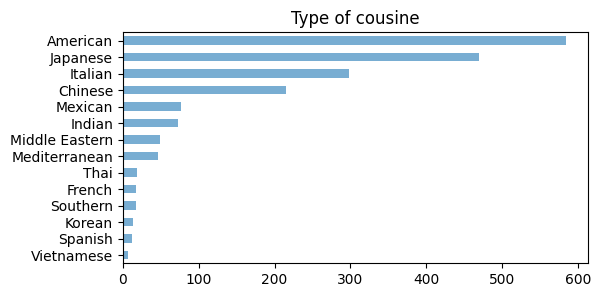

In [67]:
name_of_cousine = name_of_cousine.sort_values()

plt.figure(figsize=(6,3))
name_of_cousine.plot(kind='barh', alpha=0.6, color= '#1f77b4')
plt.title('Type of cousine')

plt.show()


The "cuisine_type" column in the DataFrame contains 14 unique cuisine types. Here is the count of top 5 cuisine type along with the number of occurrences in the dataset:

- American: 584 occurrences
- Japanese: 470 occurrences
- Italian: 298 occurrences
- Chinese: 215 occurrences
- Mexican: 77 occurrences

Let's explore the <b>'cost_of_the_order'</b>: 

In [14]:
df['cost_of_the_order'].describe()


count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

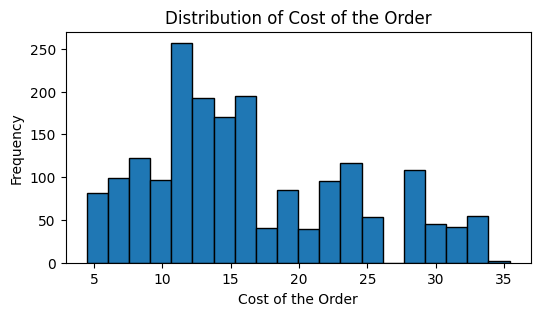

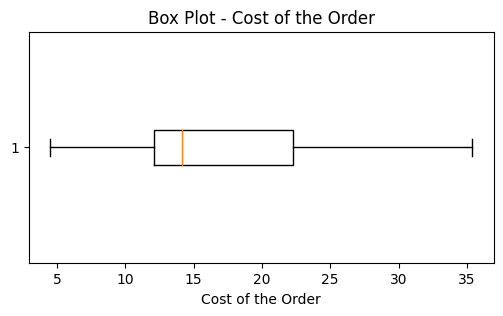

In [15]:
## Plot a histogram to visualize the distribution
plt.figure(figsize=(6, 3))
plt.hist(df['cost_of_the_order'], bins=20, edgecolor='k', color= '#1f77b4' )
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()

# Plot a box plot to identify outliers and quartiles
plt.figure(figsize=(6, 3))
plt.boxplot(df['cost_of_the_order'], vert=False)
plt.xlabel('Cost of the Order')
plt.title('Box Plot - Cost of the Order')
plt.show() 

- The 'cost_of_the_order' column shows a range of order costs, with a <b>mean value of approximately 16.50</b>.
- The <b>standard deviation of 7.48</b> suggests that there is some variability in the order costs around the mean. 
- The distribution appears to be <b>positively skewed</b> since the mean (16.50) is greater than the median (14.14).

By reviewing the descriptive statistics, we can gain insights into the central tendency, variability, and spread of the order costs. This information is crucial for decision-making, budgeting, pricing strategies, and identifying potential outliers or unusual order costs that may need further investigation.

Creating categories for column 'cost_of_the_order':

In [16]:
# Define the time intervals or bins for categorization
cost_bins = [0, 15, 20, 25, 30, 35, float('inf')]  # Bins: (0-10], (10-15], (15-20], (20-25], (25-30], (30-35], (35+)

# Define the labels for the categories
cost_labels = ['0-15', '15-20', '20-25', '25-30', '30-35', '35+']

# Categorize the 'cost_of_the_ordere' into bins
df['cost_order_category'] = pd.cut(df['cost_of_the_order'], bins=cost_bins, labels=cost_labels)

# Count the occurrences of each category
cost_counts = df['cost_order_category'].value_counts().sort_index()

# Print the categorized counts
print(cost_counts)

0-15     1008
15-20     335
20-25     250
25-30     205
30-35      99
35+         1
Name: cost_order_category, dtype: int64


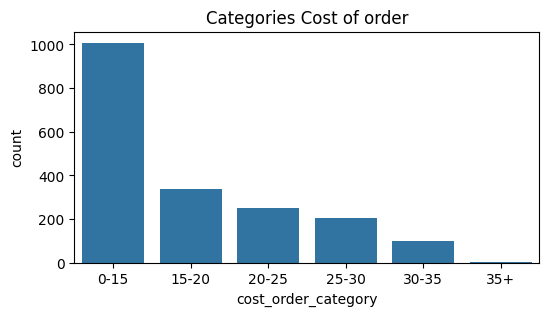

In [17]:
# Show the number of datapoints with each value of a categorical variable 'rating':
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'cost_order_category',color= '#1f77b4')
plt.title("Categories Cost of order")
plt.show()

The categorization of 'cost_of_the_order' into different cost intervals provides a clearer view of the distribution of order costs. The majority of orders fall within the lower cost ranges, with the highest number of orders falling in the '10-15' category. The frequency of orders generally decreases as the cost increases, which is expected in many scenarios.

However, there is a sharp drop in the number of orders in the '30-35' category compared to the '25-30' category. This could indicate a significant change in customer behavior or pricing strategies in that specific cost range.

Exploring column 'day_of_the_week':

In [18]:
cont_days_of_week = df['day_of_the_week'].value_counts()
cont_days_of_week

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Exploring column 'rating':

In [19]:
rating = df['rating'].value_counts()
rating

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

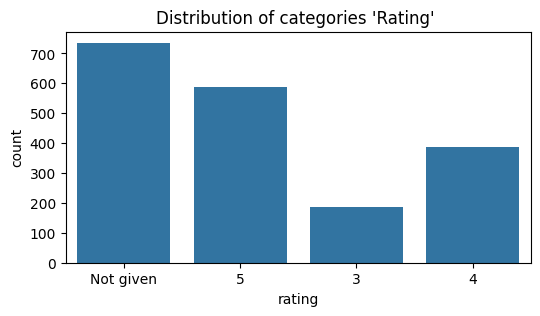

In [20]:
# Show the number of datapoints with each value of a categorical variable 'rating':
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'rating',color= '#1f77b4')
plt.title("Distribution of categories 'Rating' ")
plt.show()

Explorining columns 'food_preparation_time' and 'delivery_time': 

In [21]:
food_prep_time = df['food_preparation_time'].value_counts().sort_index()

food_prep_time

20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: food_preparation_time, dtype: int64

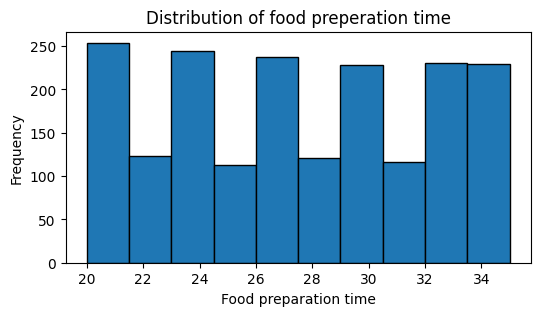

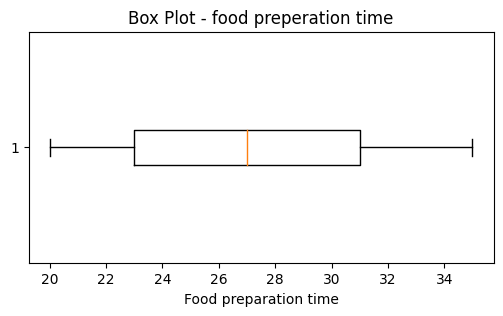

In [22]:
## Plot a histogram to visualize the distribution
plt.figure(figsize=(6, 3))
plt.hist(df['food_preparation_time'], edgecolor='k', color= '#1f77b4' )
plt.xlabel('Food preparation time')
plt.ylabel('Frequency')
plt.title('Distribution of food preperation time')
plt.show()

# Plot a box plot to identify outliers and quartiles
plt.figure(figsize=(6, 3))
plt.boxplot(df['food_preparation_time'], vert=False)
plt.xlabel('Food preparation time')
plt.title('Box Plot - food preperation time')
plt.show() 


Make categorize for 'food_preparation_time':

In [23]:
# Define the time intervals or bins for categorization
time_bins = [0, 20, 25, 30, float('inf')]  # Bins: (0-20], (20-25], (25-30], (30-35], (35+)


time_labels = ['0-20', '20-25', '25-30', '30-35'] # Define the labels for the categories

# Categorize the 'food_preparation_time' into bins and add new column to df 'preparation_time_category'
df['preparation_time_category'] = pd.cut(df['food_preparation_time'], bins=time_bins, labels=time_labels)


In [24]:
# Count the occurrences of each category
preparation_time_counts = df['preparation_time_category'].value_counts()

print(preparation_time_counts)

20-25    615
25-30    587
30-35    577
0-20     119
Name: preparation_time_category, dtype: int64


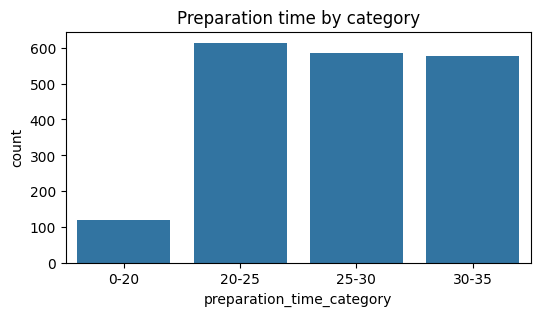

In [25]:
# Show the number of datapoints with each value of a categorical variable 'preparation_time_category':
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'preparation_time_category',color= '#1f77b4')
plt.title("Preparation time by category")
plt.show()

In [26]:
delivery_time = df['delivery_time'].value_counts().sort_index()
delivery_time

15     87
16     90
17     78
18     83
19     90
20     88
21     81
22     85
23     77
24    162
25    120
26    141
27    138
28    148
29    148
30    133
31     41
32     59
33     49
Name: delivery_time, dtype: int64

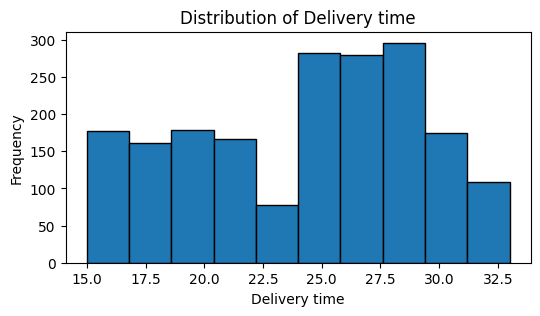

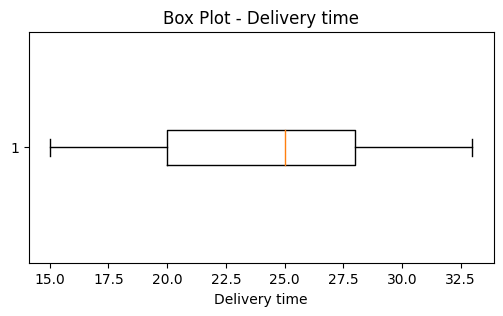

In [27]:
## Plot a histogram to visualize the distribution
plt.figure(figsize=(6, 3))
plt.hist(df['delivery_time'], edgecolor='k', color= '#1f77b4' )
plt.xlabel('Delivery time')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery time')
plt.show()

# Plot a box plot to identify outliers and quartiles
plt.figure(figsize=(6, 3))
plt.boxplot(df['delivery_time'], vert=False)
plt.xlabel('Delivery time')
plt.title('Box Plot - Delivery time')
plt.show() 

In [29]:
# Define the time intervals or bins for categorization
delivery_bins = [15, 20, 25, 30, float('inf')]  # Bins: (0-20], (20-25], (25-30], (30-35], (35+)


delivery_labels = ['15-20', '20-25', '25-30', '30-35'] # Define the labels for the categories

# Categorize the 'food_preparation_time' into bins and add new column to df 'preparation_time_category'
df['delivery_time_category'] = pd.cut(df['delivery_time'], bins=delivery_bins, labels=delivery_labels)

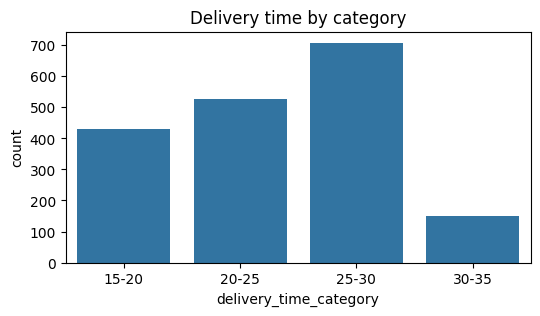

In [30]:
# Show the number of datapoints with each value of a categorical variable 'preparation_time_category':
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'delivery_time_category',color= '#1f77b4')
plt.title("Delivery time by category")
plt.show()

Based on the 'delivery_time' distribution, we can draw the following conclusions:

<b>Order Delivery Time Distribution:</b>
- The 'delivery_time' column contains a range of delivery time values, represented in minutes.
- The delivery time values are grouped into different intervals or bins.

<b>Peak Delivery Times:</b>
- The delivery times of 24 minutes, 25 minutes, 26 minutes, 27 minutes, and 28 minutes appear to have relatively high frequencies, with 162, 120, 141, 138, and 148 occurrences, respectively. These times seem to be common or preferred delivery durations.

<b>Fast Delivery:</b>

- The delivery times from 15 minutes to 23 minutes have moderate frequencies, with the minimum being 77 occurrences for 23 minutes. 
- These shorter delivery times might represent faster deliveries or orders from nearby locations.

<b>Longer Delivery Times:</b>

- The delivery times from 29 minutes to 33 minutes have moderate frequencies, indicating that there are orders with longer delivery durations.

<b>Outliers:</b>
- There are lower frequencies for delivery times of 31 minutes, 32 minutes, and 33 minutes, which might indicate less common or outlier delivery durations.

The data appears to be well-distributed and covers a range of delivery times, with no obvious data quality issues or missing values.
The 'delivery_time' distribution provides valuable insights into the distribution of delivery durations for orders. The analysis can help businesses in the food delivery industry to optimize delivery processes, estimate delivery times, and identify areas for improvement. It can also assist in setting customer expectations regarding delivery timeframes and evaluating the efficiency of delivery services. Further analysis and comparison with service level agreements (SLAs) or customer preferences may help fine-tune delivery operations for better customer satisfaction.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [31]:
top_5 = df['restaurant_name'].value_counts().head()
top_5

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


- These observations suggest that customers tend to place orders more frequently from "Shake Shack," "The Meatball Shop," "Blue Ribbon Sushi," "Blue Ribbon Fried Chicken," and "Parm." 
- This information can be valuable for the respective restaurants to understand their popularity among customers and to make decisions related to capacity planning, marketing strategies, and customer satisfaction. 
- Additionally, it may also help food delivery services to optimize delivery routes and prioritize these popular restaurants to meet customer demands effectively.

### **Question 8**: Which is the most popular cuisine on weekends?

In [32]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] # Filter the DataFrame for weekends

# Calculate the frequency of each cuisine type in the filtered df_weekend
popular_cuisine = df_weekend['cuisine_type'].value_counts()

popular_cuisine.head(5)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:


The analysis of the 'cuisine_type' distribution on weekends highlights American cuisine as the most popular choice, with Japanese, Italian, Chinese, and Mexican cuisines also being preferred by customers. 

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [33]:
orders_over_20 = df['cost_order_category'].value_counts().sort_index()[['20-25', '25-30', '30-35', '35+']].sum()
print("Number of orders that cost mare than 20$ is : ", orders_over_20)

total_orders = df['cost_order_category'].value_counts().sum() 

# Calculate the percentage of orders costing more than 20 dollars
percentage_over_20 = (orders_over_20 / total_orders) * 100

print("The percentage of the orders cost more than 20$ : ", round(percentage_over_20, 2), '%' )

Number of orders that cost mare than 20$ is :  555
The percentage of the orders cost more than 20$ :  29.24 %


#### Observations:
The analysis shows that almost one-third (29.24%) of the orders in the dataset have a cost higher than 20 dollars. This finding indicates that a significant portion of customers is willing to spend more on their orders, which could be due to various factors such as larger orders, premium menu items, delivery fees, or other service charges.

### **Question 10**: What is the mean order delivery time?

In [34]:
order_delivery_time_mean = df['delivery_time'].mean()

print('The mean order delivery time in minuts = ',round(order_delivery_time_mean,2))

The mean order delivery time in minuts =  24.16


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [35]:
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The company has decided to give 20% discount vouchers to the top 3 most frequent customers. 
Top 3 customers and the number of orders they placed:

- Customer_ID 52832   - orders = 13
- Customer_ID 47440   - orders = 10
- Customer_ID 83287   - orders = 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Perform a multivariate analysis to explore relationships between Food Preparation Time and Cuisine Type

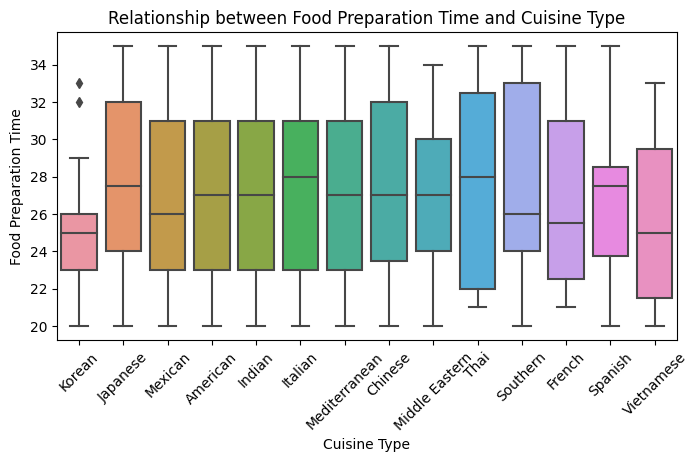

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.title('Relationship between Food Preparation Time and Cuisine Type')
plt.show()

#### Perform a multivariate analysis to explore relationships between Cost of the order and Cuisine Type

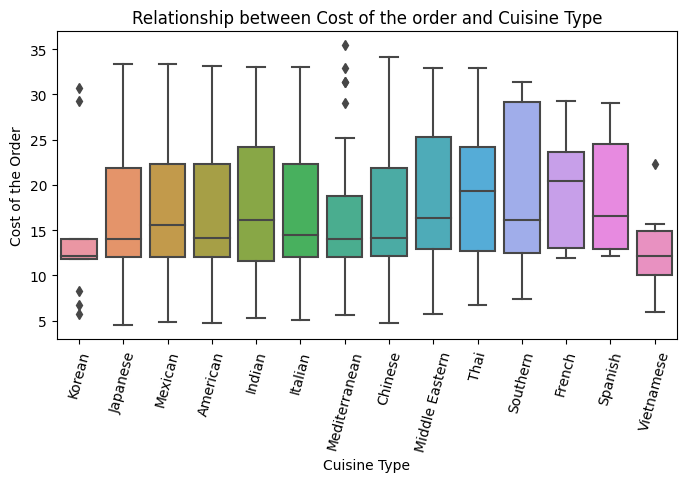

In [69]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=75)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Relationship between Cost of the order and Cuisine Type')
plt.show()

#### Perform a multivariate analysis to explore relationships between Delivery time and Days of week

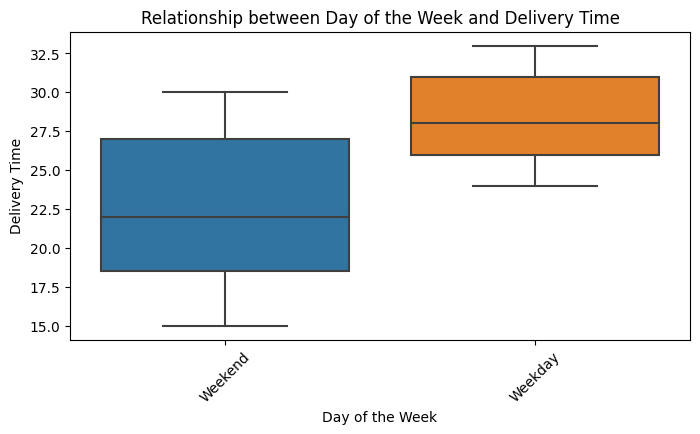

In [75]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.title('Relationship between Day of the Week and Delivery Time')
plt.show()

#### Perform a multivariate analysis to explore relationships between Rating vs Delivery time

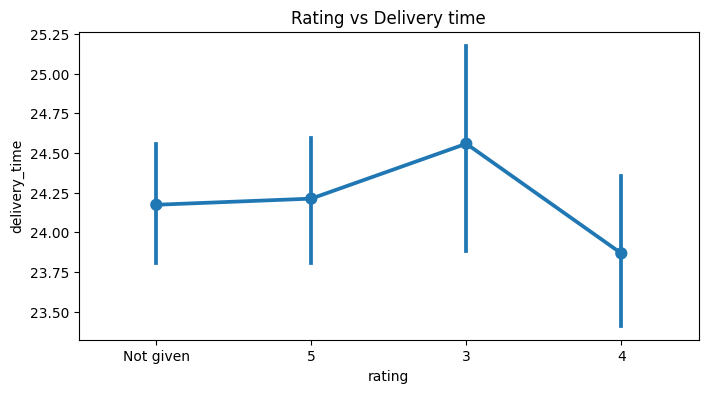

In [76]:
# Relationship between rating and delivery time
plt.figure(figsize=(8, 4))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Rating vs Delivery time')
plt.show()

#### Perform a multivariate analysis to explore relationships between Rating vs Food Preparation Time

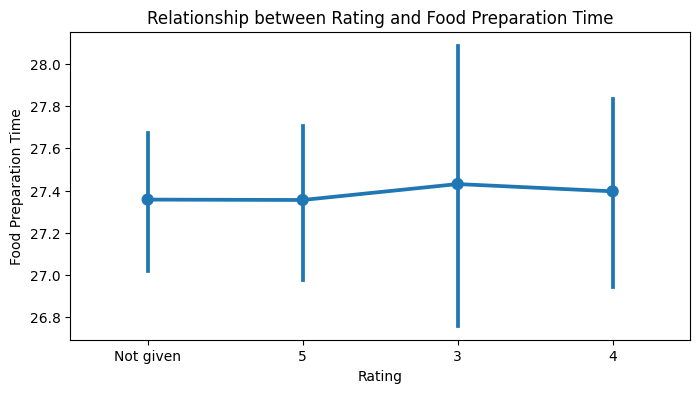

In [77]:
plt.figure(figsize=(8, 4))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.title('Relationship between Rating and Food Preparation Time')
plt.show()

##### Top Revenue-Generating Restaurants by Total Order Cost: 

In [78]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

The top 5 restaurants with the highest total revenue from orders (based on the 'cost_of_the_order' column) are as follows:

- Shake Shack: $3579.53
- The Meatball Shop: $2145.21
- Blue Ribbon Sushi: $1903.95
- Blue Ribbon Fried Chicken: $1662.29
- Parm: $1112.76

These top 5 restaurants have been able to generate the highest total revenue from their orders compared to other restaurants in the dataset.

##### Identify top 5 restaurant in Dataset and the type of cuisine:

In [38]:
top_5_restaurants = df['restaurant_name'].value_counts().head().index

# Filter the DataFrame for the top 5 restaurants
df_top_5 = df[df['restaurant_name'].isin(top_5_restaurants)]

# Group the data by 'restaurant_name' and get unique 'cuisine_type' values for each restaurant
top_5_cuisine_types = df_top_5.groupby('restaurant_name')['cuisine_type'].unique()
top_5_cuisine_types

restaurant_name
Blue Ribbon Fried Chicken             [American]
Blue Ribbon Sushi                     [Japanese]
Parm                                   [Italian]
Shake Shack                           [American]
The Meatball Shop            [Italian, American]
Name: cuisine_type, dtype: object

Understanding the cuisine type of each restaurant helps in identifying the diversity of dining options available to customers.

#### - Perform a multivariate analysis to explore relationships between Cost Order Category for Top 5 Restaurants

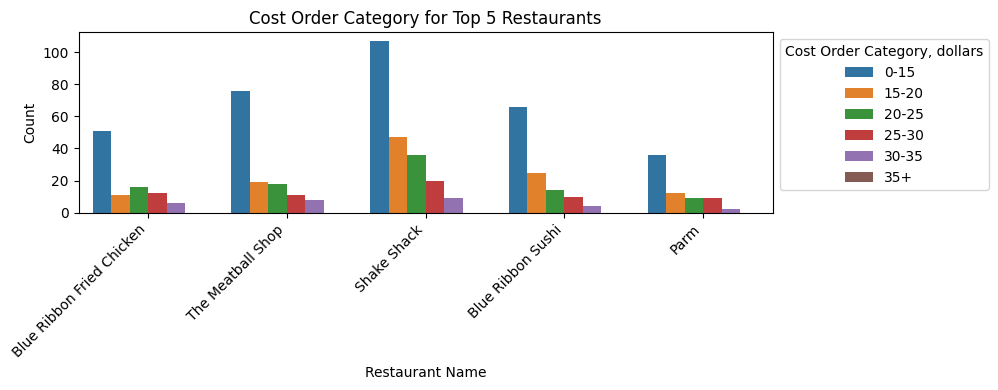

In [79]:
df_top_5 = df[df['restaurant_name'].isin(top_5_restaurants)]

plt.figure(figsize=(8, 4))
sns.countplot(data=df_top_5, x='restaurant_name', hue='cost_order_category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Cost Order Category for Top 5 Restaurants')
plt.legend(title='Cost Order Category, dollars', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Among the top 5 restaurants, "Shake Shack" and "The Meatball Shop" have the highest number of orders falling in the "10-15" dollars cost category.

The visualization allows us to compare the distribution of cost order categories for each of the top 5 restaurants, providing valuable insights into their pricing preferences and popularity based on cost.

#### -  Preparation Time Category for Top 5 popular by orders Restaurants : 

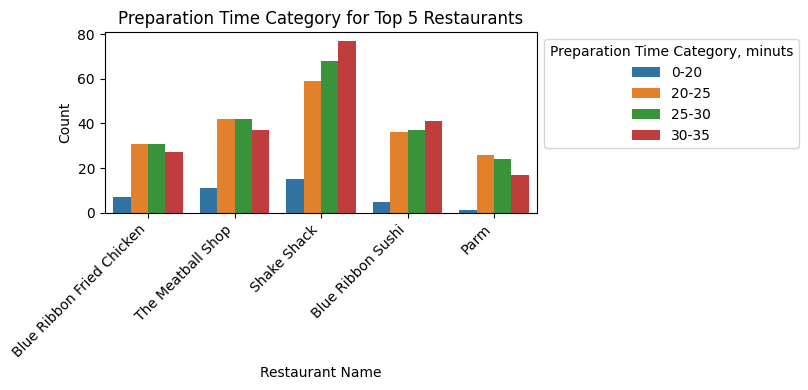

In [74]:
df_top_5 = df[df['restaurant_name'].isin(top_5_restaurants)]

plt.figure(figsize=(8, 4))
sns.countplot(data=df_top_5, x='restaurant_name', hue='preparation_time_category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Preparation Time Category for Top 5 Restaurants')
plt.legend(title='Preparation Time Category, minuts', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Among the top 5 restaurants, "Shake Shack" and "The Meatball Shop" have the highest number of orders falling in the "20-25" minutes preparation time category, and "Shake Shack" has the hiest number for time "30-35" minuts. 

The visualization allows us to compare the distribution of preparation time categories for each of the top 5 restaurants, providing valuable insights into their food preparation efficiency and potential customer wait times.

#### -  Delivery Time Category for Top 5 popular by orders Restaurants : 

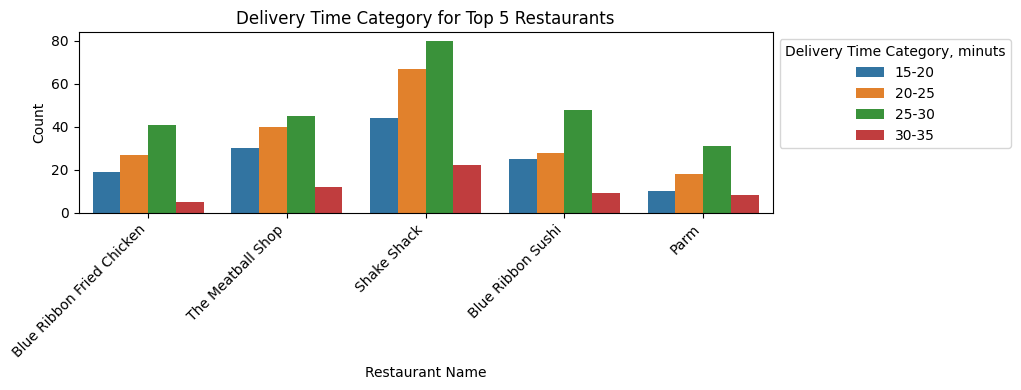

In [72]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_top_5, x='restaurant_name', hue='delivery_time_category') 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Delivery Time Category for Top 5 Restaurants')
plt.legend(title='Delivery Time Category, minuts', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The visualization allows us to compare the distribution of delivery time categories for each of the top 5 restaurants, providing valuable insights into their delivery efficiency and potential customer wait times. It appears that "Shake Shack" and "The Meatball Shop" might have longer delivery times compared to the other three restaurants in the top 5. 
Further analysis and improvements in delivery processes may be needed to optimize delivery times for these restaurants.

### Correlation among variables

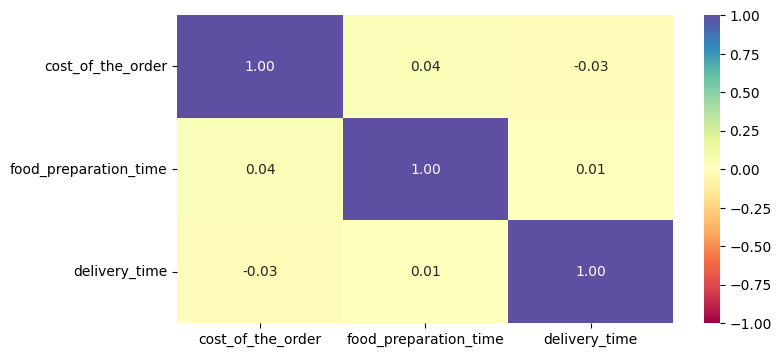

In [47]:
cor_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 4))
sns.heatmap(df[cor_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

From the correlation heatmap, we can draw the following conclusions:

the correlation coefficients between these variables are all very close to zero, indicating that there is no strong linear relationship between any of them. 

Therefore, we can conclude that there is no significant correlation between the cost of the order, food preparation time, and delivery time in this dataset. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [87]:
df_rating_not_given = df[df['rating'] != 'Not given']

# groupby 'restaurant_name' and calculate the rating count and mean
restaurant_stats = df_rating_not_given.groupby('restaurant_name')['rating'].agg(['count', 'mean']) 

# Filter the restaurants by (count > 50 and mean > 4)
res = (restaurant_stats['mean']>4) & (restaurant_stats['count'] > 50)
restaurant_stats.loc[res]

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,5.552274e+61
Blue Ribbon Sushi,73,6.089773e+70
Shake Shack,133,4.177018e+130
The Meatball Shop,84,6.494697e+81


#### Observations:


It appears that there are data quality issues in the "rating" variable for these restaurants. The mean rating values are extremely large and do not make sense. The data needs further validation and cleaning before drawing any conclusions or making business decisions based on it.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [49]:
# Calculate commission for each order. Checking condition cost of order >20, and cost of order >5 and <20
df['commission'] = 0.25 * df['cost_of_the_order'].where(df['cost_of_the_order'] > 20, 0) + \
                   0.15 * df['cost_of_the_order'].where((df['cost_of_the_order'] <= 20) & (df['cost_of_the_order'] > 5), 0)

# Calculate the total net revenue 
net_revenue = df['commission'].sum()

print("Net Revenue: $", net_revenue)

Net Revenue: $ 6166.303


In [93]:
total_orders = df.shape[0]

# Get the number of orders with cost greater than $20
orders_over_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Get the number of orders with cost between $5 and $20
orders_between_5_and_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)].shape[0]

# Calculate the percentage of orders with cost greater than $20
percentage_over_20 = (orders_over_20 / total_orders) * 100

# Calculate the percentage of orders with cost between $5 and $20
percentage_between_5_and_20 = (orders_between_5_and_20 / total_orders) * 100

# Print the percentages
print("Percentage of orders with cost greater than $20:", round(percentage_over_20, 2), "%")
print("Percentage of orders with cost between $5 and $20:", round(percentage_between_5_and_20, 2), "%")

Percentage of orders with cost greater than $20: 29.24 %
Percentage of orders with cost between $5 and $20: 70.28 %


#### Observations:


The net revenue of $6166.303 indicates the overall income earned by the company after applying the charges to the orders. It reflects the revenue collected from the restaurants while incentivizing higher order values.

From the analysis, we can observe that approximately 29.24% of the orders have a cost greater than $20, while about 70.28% of the orders have a cost between $5 and $20. This indicates that the majority of orders fall within the $5 to $20 price range.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [57]:
# total time = 'food_prep_time' + 'delivery_time'

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

more_than_60_min = df[df['total_time']>60] # filterd data to get all orders >60 min to ready

percentage_more_than_60 = (more_than_60_min.shape[0] / df.shape[0]) * 100 # getting the percentage of all data orders >60 min to ready

print('The percentage of orders take more than 60 minutes to get delivered from the time the order is placed:', round(percentage_more_than_60, 2), "%.")

The percentage of orders take more than 60 minutes to get delivered from the time the order is placed: 10.54 %.


#### Observations:
Approximately 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed. This information can be crucial for the company to optimize delivery processes and enhance customer satisfaction.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [63]:
# filtering data to get Weekdays and Weekends and aply mean()
df_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
df_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()


print("Mean Delivery Time on Weekdays, minuts :", round(df_weekdays, 2) )
print("Mean Delivery Time on Weekends, minuts :", round(df_weekends, 2) )


Mean Delivery Time on Weekdays, minuts : 28.34
Mean Delivery Time on Weekends, minuts : 22.47


#### Observations:

The company has analyzed the delivery time of orders on weekdays and weekends. The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends, it is approximately 22.47 minutes.

This observation suggests that the delivery time is relatively shorter on weekends compared to weekdays. It could indicate that the company might have more staff or streamlined processes during weekends, leading to quicker deliveries.

### Conclusion and Recommendations



### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*   The dataset consists of 1898 orders from various restaurants, with 736 orders having "Not given" ratings and the rest having ratings ranging from 3 to 5.
*   The dataset contains orders from 14 different cuisine types, with American and Japanese cuisines being the most popular ones.
*   The average cost of orders is $16.50, with the majority of orders falling in the cost range of $0-$15.
*   The majority of orders are placed on weekends compared to weekdays.
*   The company received a good number of positive ratings (4 and 5) for most restaurants, indicating overall customer satisfaction.
*   The percentage of orders that cost more than $20 is approximately 29.24%, suggesting that a significant portion of orders is relatively higher priced. while about 70.28% of the orders have a cost between $5 and $20. This indicates that the majority of orders fall within the $5 to $20 price range.
This information could be valuable for the business to strategize their promotional offers and marketing campaigns. Since a significant portion of the orders lies in the $5 to $20 range, the company could focus on attracting more customers within this price range.
*   The mean delivery time for all orders is approximately 24 minutes, and around 10.54% of orders take more than 60 minutes to get delivered.

### Recommendations:

*   <b>Promotional Offer:</b> The company should focus on promoting restaurants that have both a rating count of more than 50 and an average rating greater than 4. This can be a powerful marketing strategy to attract more customers and boost the business of the featured restaurants. Since a significant portion of the orders lies in the $5 to $20 range, the company could focus on attracting more customers within this price range. They can design special deals, discounts, or combo offers to incentivize customers to place more orders in this price bracket. Additionally, the company could also target the high-value orders (greater than $20) and come up with exclusive offers for customers who spend more, as they contribute to a substantial portion of the total revenue.

*  <b>Cuisine Specialization:</b> Analyzing the cuisine types can help the company identify popular cuisines and understand customer preferences. They can use this information to collaborate with restaurants and develop specialized marketing campaigns or offers targeting customers who enjoy specific cuisines.

*   <b>Feedback Collection:</b> Encouraging customers to provide feedback and ratings can help improve the overall quality of service and identify areas for improvement. The company can incentivize customers to leave feedback by offering discounts or rewards for their next order.

*   <b>Delivery Time Optimization:</b> The company should focus on reducing delivery times, especially during weekdays, to improve customer satisfaction. They can consider optimizing delivery routes, using real-time tracking, and providing incentives to delivery personnel for faster deliveries.

*   <b>Cost Segmentation:</b> Understanding the distribution of order costs can help the company segment its target audience. They can create different marketing strategies for budget-conscious customers (lower-cost orders) and premium customers (higher-cost orders).

*   <b>Menu Recommendations:</b> Analyzing the cuisine types and customer feedback can provide insights into popular dishes. The company can use this data to recommend specific dishes to customers, increasing the chances of upselling and improving the overall dining experience.

*   <b>Weekend Specials:</b> Since weekends have a higher volume of orders, the company can collaborate with restaurants to introduce weekend-specific offers and promotions. This can attract more customers and generate increased revenue during peak times.

*   <b>Delivery Time Awareness:</b> The company can set clear expectations regarding delivery times to customers during peak hours or weekends. Providing real-time delivery tracking can also help manage customer expectations and reduce complaints related to delivery delays.









---